In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
DF = pd.read_csv('insurance.csv')
DF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
DF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
DF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualization

Text(0.5, 1.0, 'Distribution of Charges')

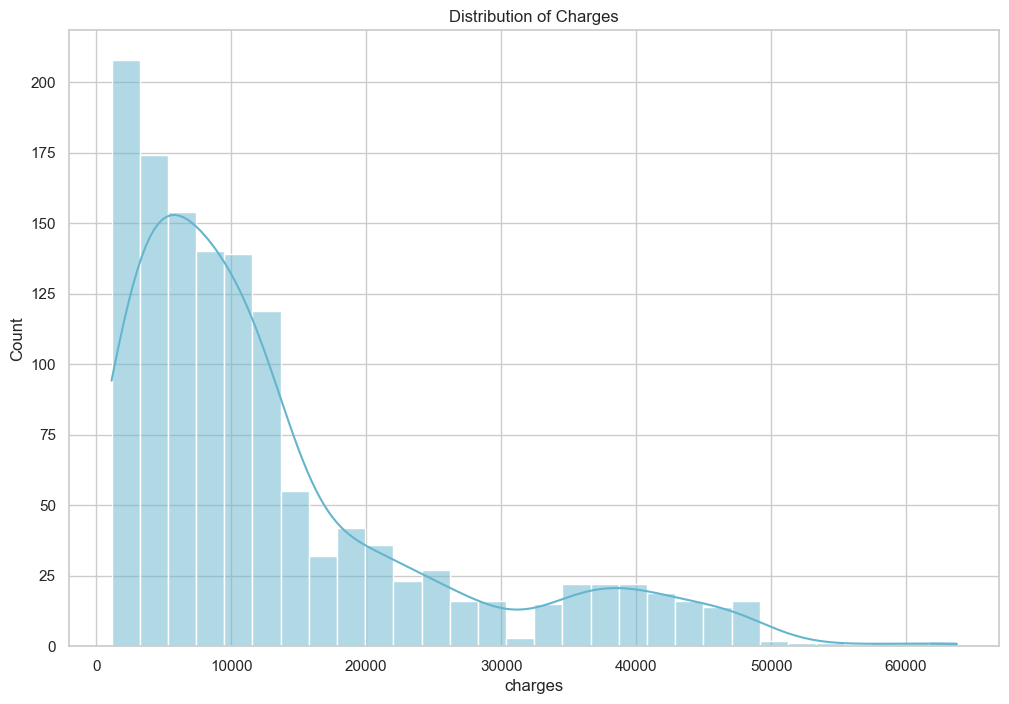

In [6]:
sns.set(style = 'whitegrid')
f,ax = plt.subplots(1,1, figsize =(12,8))
ax = sns.histplot(DF['charges'] ,kde = True, color ='c')
plt.title('Distribution of Charges')                 

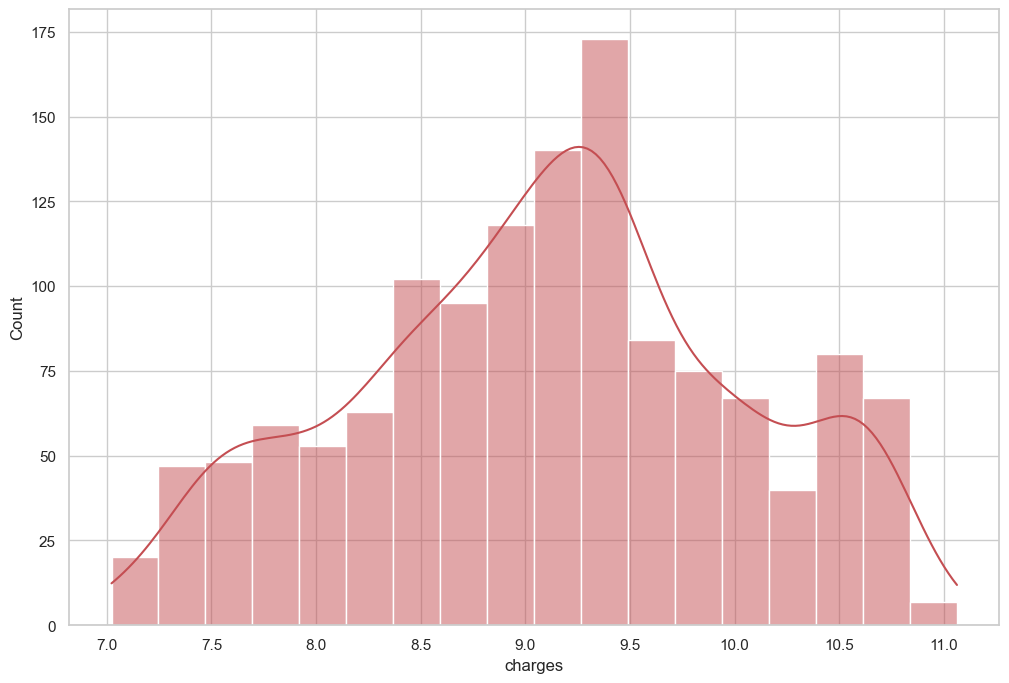

In [7]:
## Price label is rightskrew use natural log into price label to Normaldistribution
#Log transform
DF['charges'] = np.log(DF['charges'])
f,ax = plt.subplots(1,1 ,figsize = (12,8))
ax = sns.histplot(DF['charges'],kde = True , color = 'r')

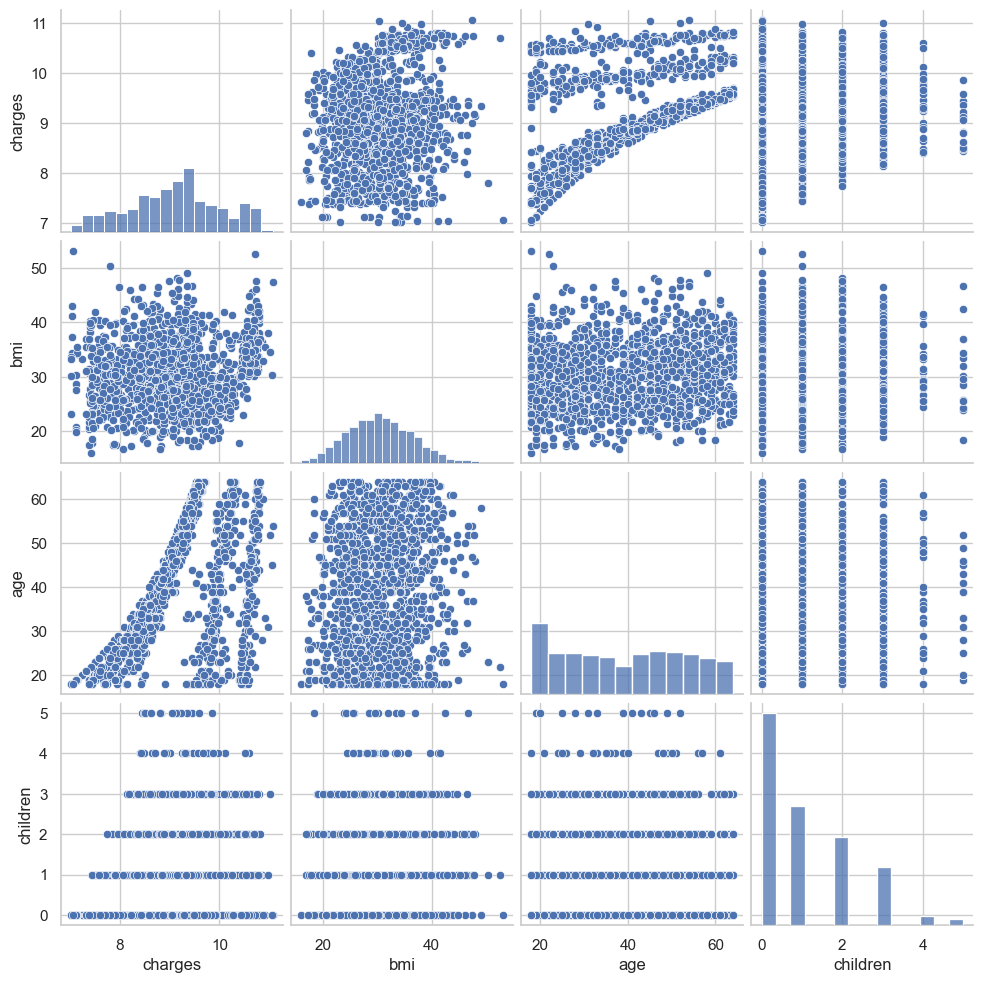

In [8]:
sns.pairplot(DF[['charges','bmi','age','children']])

Text(0.5, 1.0, 'Violin plot of medical charges vs smoker')

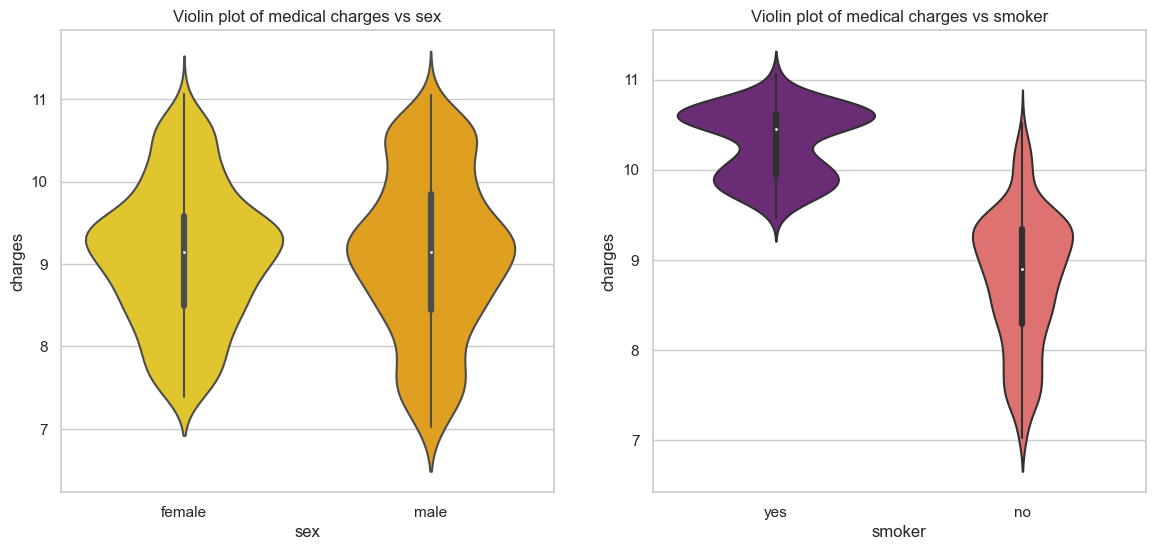

In [9]:
#Visualize medical charges vs binary factor sex and smoker
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=DF,palette='Wistia',ax=ax)
ax.set_title('Violin plot of medical charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=DF,palette='magma',ax=ax)
ax.set_title('Violin plot of medical charges vs smoker')

Text(0.5, 1.0, 'Bar plot medical Charges vs region by smoker')

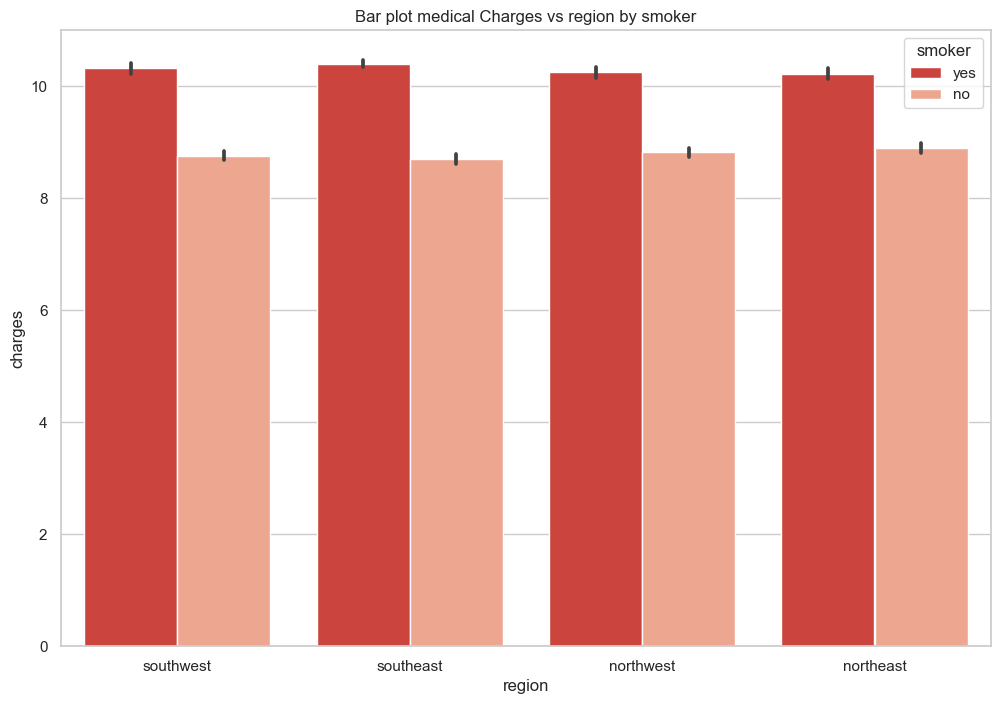

In [10]:
#Visualize medical Charges vs region by smoker
plt.figure(figsize =(12,8))
sns.barplot(x='region', y='charges',data=DF,hue = 'smoker' ,palette='Reds_r')
plt.title('Bar plot medical Charges vs region by smoker')

Text(0.5, 1.0, 'Bar plot Charges vs region by children')

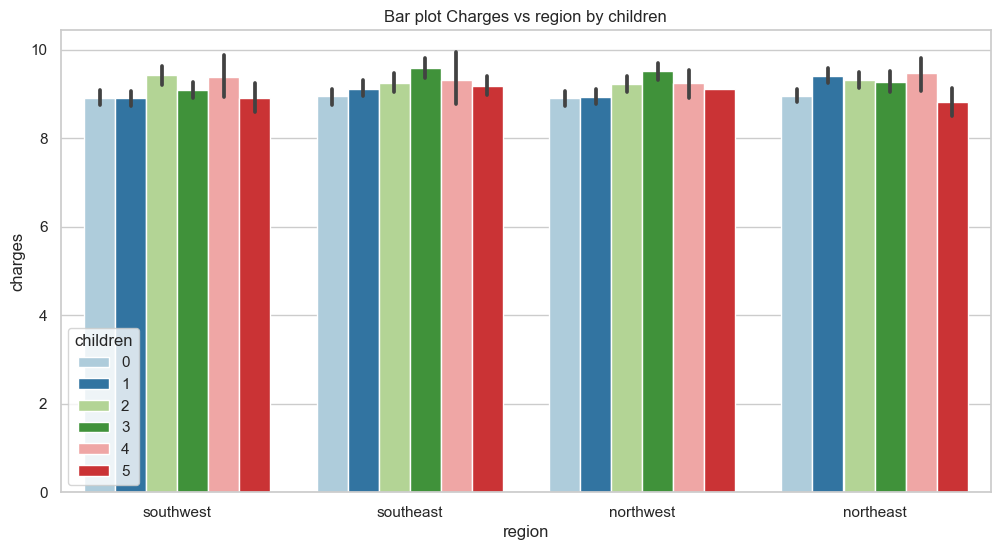

In [11]:
#Visualize charges vs region by children 
plt.figure(figsize =(12,6))
sns.barplot(x='region', y='charges',data= DF,hue = 'children' ,palette='Paired')
plt.title('Bar plot Charges vs region by children')

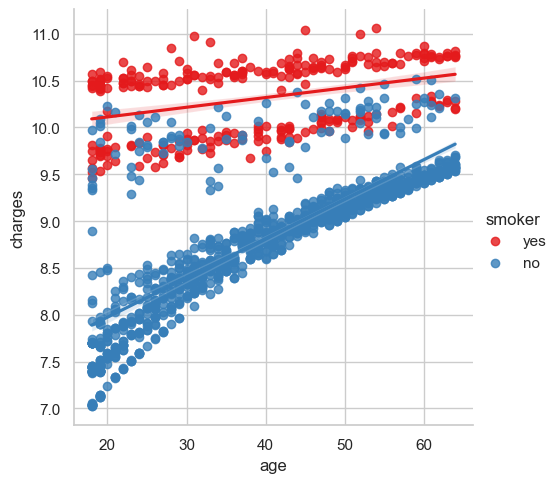

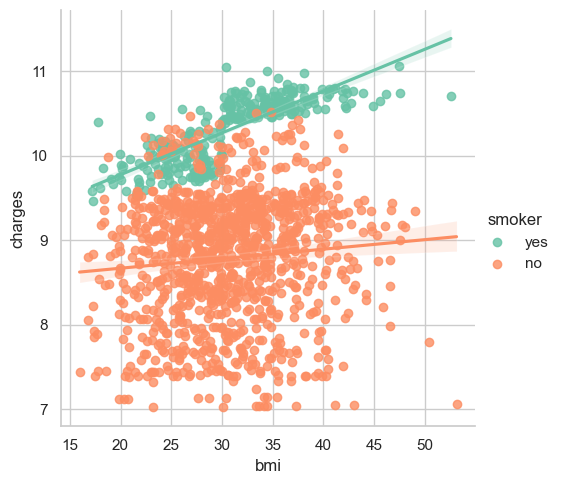

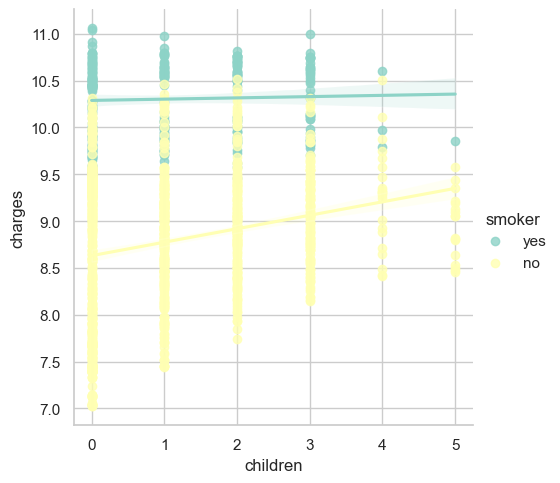

In [12]:
#Visualize other factor by smoker
ax = sns.lmplot(x = 'age', y = 'charges', data = DF, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data = DF, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data = DF, hue='smoker', palette='Set3')

Smoking factor is the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the  following violinplots shows too

Text(0.5, 1.0, 'Violin plot medical charges vs number of children by smoker')

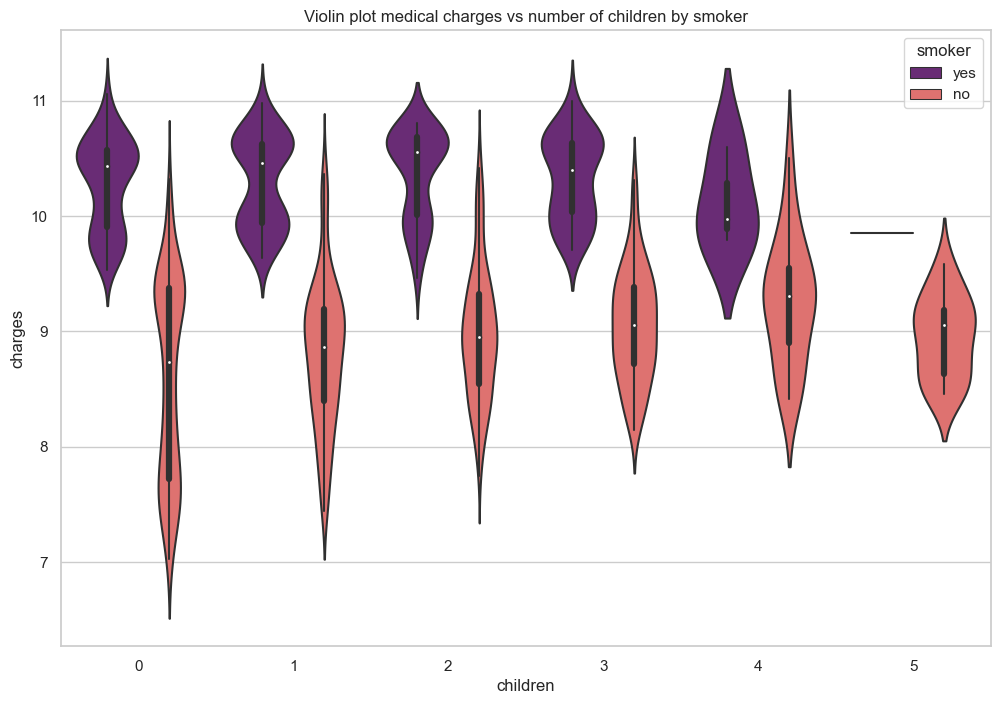

In [13]:
#Visualize Charges vs number of children by smoker 
plt.figure(figsize =(12,8))
sns.violinplot(x='children', y='charges',data=DF,hue = 'smoker' ,palette='magma')
plt.title('Violin plot medical charges vs number of children by smoker')

In [14]:
#Get dummy varible
Dummies = pd.get_dummies(DF[['sex','smoker','region']]).astype('float64')
print(Dummies.shape)
Dummies.head()

(1338, 8)


,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#Segerete categories variables and numeric variables
Cat_col = DF.select_dtypes(include = ['object']).columns
Con_col = DF.select_dtypes(exclude = ['object']).columns
DF_Cat = DF[Cat_col]
DF_Con = DF[Con_col]

In [16]:
DF_Cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [17]:
DF_Con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [18]:
#Combine dummy variable and numeric variable
DF_Merge = pd.concat([DF_Con,Dummies],axis=1)
DF_Merge.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,7.453302,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,8.400538,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,9.998092,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,8.260197,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#Visualization heatmap correlation
DF_Merge.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.527834,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.132669,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.161336,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.527834,0.132669,0.161336,1.000000,-0.005632,0.005632,-0.665506,0.665506,0.043115,-0.017824,0.015791,-0.041632
sex_female,0.020856,-0.046371,-0.017163,-0.005632,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.005632,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.665506,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.665506,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.043115,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.017824,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [20]:
X = DF_Merge.drop(['charges'],axis =1)
y = DF['charges']

Train Model 

In [21]:
##Split data to train test
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size = 0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


Linear Regression Model

In [22]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
R2_linear = lm.score(X_test,y_test)
print("R2 train : ",lm.score(X_train,y_train))
print("R2 test :",R2_linear)
print("Intercept : ",lm.intercept_)
print("coefficient : ",lm.coef_)

R2 train :  0.7620043923521439
R2 test : 0.790289233109665
Intercept :  7.662498302786972
coefficient :  [ 0.03472597  0.0141254   0.0978909   0.02564337 -0.02564337 -0.7813812
  0.7813812   0.07881345  0.02536705 -0.06562163 -0.03855886]


In [24]:
#Create Prediction to dataframe
y_predicted = lm.predict(X_test)
y_predicted = pd.DataFrame(y_predicted).rename(columns ={0:'Predicted_charges'})
y_predicted

,Predicted_charges
0,9.147143
1,8.986013
2,10.879228
3,9.541258
4,8.958116
...,...
263,9.711674
264,8.803729
265,9.482639
266,10.290950


In [25]:
y_test = y_test.reset_index().drop(columns = 'index')
y_test

,charges
0,9.182407
1,9.053417
2,10.729898
3,9.468857
4,9.174117
...,...
263,9.617122
264,8.804578
265,9.938325
266,10.619678


In [26]:
DF_Compare = pd.concat([y_test,y_predicted],axis=1)
DF_Compare

,charges,Predicted_charges
0,9.182407,9.147143
1,9.053417,8.986013
2,10.729898,10.879228
3,9.468857,9.541258
4,9.174117,8.958116
...,...,...
263,9.617122,9.711674
264,8.804578,8.803729
265,9.938325,9.482639
266,10.619678,10.290950


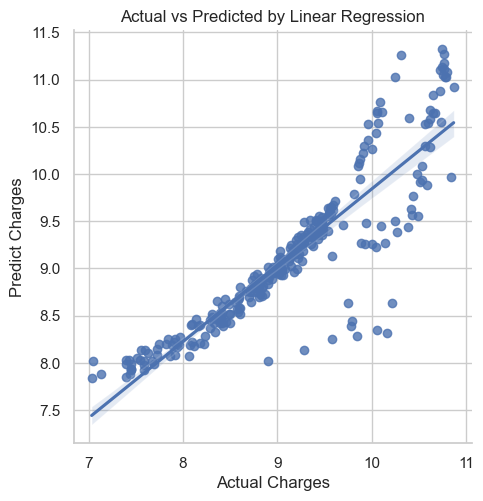

In [27]:
#Visualization Actual charge and Prediction charges
sns.lmplot(x = 'charges',y = 'Predicted_charges',data = DF_Compare)
plt.title("Actual vs Predicted by Linear Regression")
plt.xlabel("Actual Charges")
plt.ylabel("Predict Charges")
plt.show()

In [28]:
## Mean Absolut Error
from sklearn.metrics import mean_absolute_error

Mae = mean_absolute_error(y_test,y_predicted)
print(Mae)

0.2633659771271818


In [29]:
##check Mean Square Error(MAE)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(y_train_pred,y_train),
       metrics.mean_squared_error(y_test_pred,y_test)))

MSE train data: 0.201, MSE test data: 0.176


In [30]:
## Root mean squared error
rmse = metrics.mean_squared_error(DF_Compare[['charges']],DF_Compare[['Predicted_charges']],squared = False )
print('rmse :',rmse)

rmse : 0.41965293507344875


Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

RandomForest = RandomForestRegressor(n_estimators = 100,
                                     max_features= 0.6,min_samples_leaf = 2,
                                    n_jobs = -1,oob_score =True )

In [32]:
RandomForest.fit(X_train,y_train)

RandomForestRegressor(max_features=0.6, min_samples_leaf=2, n_jobs=-1,
                      oob_score=True)

In [33]:
y_train_pred = RandomForest.predict(X_train)
y_test_pred = RandomForest.predict(X_test)

R2_Randomforest = metrics.r2_score(y_test_pred,y_test)
print("MSE train",metrics.mean_squared_error(y_train_pred,y_train))
print("MSE test",metrics.mean_squared_error(y_test_pred,y_test))
print("R2 train",metrics.r2_score(y_train_pred,y_train))
print("R2 test",R2_Randomforest)

MSE train 0.06388880368638872
MSE test 0.10460097056841987
R2 train 0.9118992306150724
R2 test 0.852460391465195


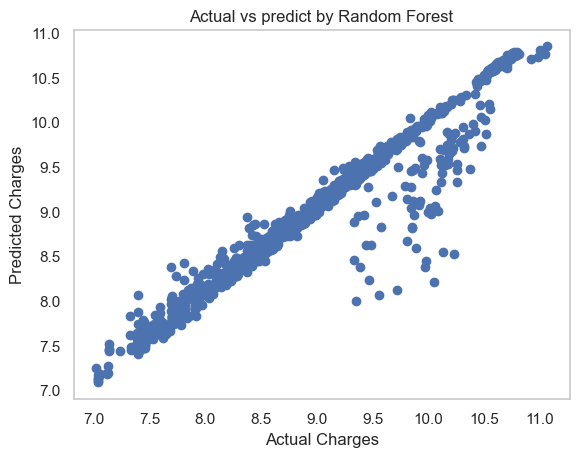

In [34]:
plt.scatter(y_train,y_train_pred)
plt.title('Actual vs predict by Random Forest')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid()
plt.show()

XGboost model

In [35]:
from xgboost import XGBRegressor
XGreg = XGBRegressor(n_estimators = 100,max_depth = 3 ,learning_rate = 0.1)

In [36]:
#Train XGBoost model
XGreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
y_train_pred = XGreg.predict(X_train)
y_test_pred = XGreg.predict(X_test)

R2_XGB = metrics.r2_score(y_test_pred,y_test)
print("MSE train",metrics.mean_squared_error(y_train_pred,y_train))
print("MSE test",metrics.mean_squared_error(y_test_pred,y_test))
print("R2 train",metrics.r2_score(y_train_pred,y_train))
print("R2 test",R2_XGB)

MSE train 0.10948609319921553
MSE test 0.106354374772613
R2 train 0.8452556110389513
R2 test 0.8496119609003254


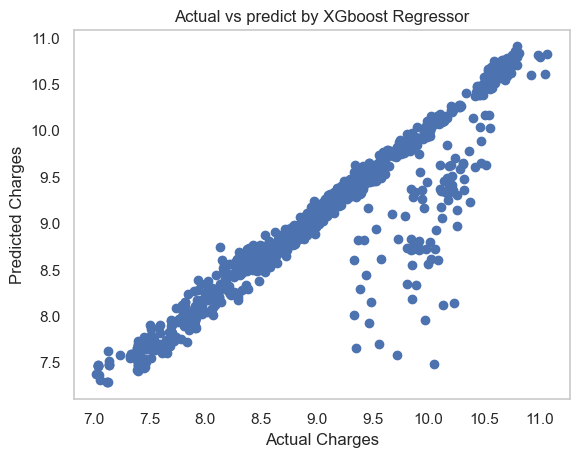

In [38]:
plt.scatter(y_train,y_train_pred)
plt.title('Actual vs predict by XGboost Regressor')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid()
plt.show()

Polynomial Regression

In [39]:
#import model
from sklearn.preprocessing import PolynomialFeatures

In [40]:
#Train Polynomial Regression model
pol = PolynomialFeatures (degree = 2)
X_pol = pol.fit_transform(X)
#Split train test again
x_train, x_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 78)
(268, 78)
(1070,)
(268,)


In [41]:
Pol_LM = LinearRegression()
Pol_LM.fit(x_train, y_train)

LinearRegression()

In [42]:
y_train_pred = Pol_LM.predict(x_train)
y_test_pred = Pol_LM.predict(x_test)

print("intercept :",Pol_LM.intercept_)
print("Coefficient :",Pol_LM.coef_)

intercept : -19206723875.334457
Coefficient : [ 1.92067239e+10  9.15830835e-04  8.59346958e-03  8.45166286e-02
  6.31169113e-02 -6.31169113e-02 -2.60173182e-01  2.60173182e-01
  2.15087032e-02  3.65888500e-03 -9.72524711e-04 -2.41950634e-02
  9.18514231e-05  5.81252952e-04 -3.80924437e-03 -1.82366224e-03
  2.73949307e-03  1.72023114e-02 -1.62864805e-02 -8.34791836e-03
  4.32476181e-03  9.05481610e-04  4.03350578e-03 -2.79451914e-04
  1.40903016e-03  1.11002048e-03  7.48344909e-03 -2.08584018e-02
  2.94518713e-02  1.28220088e-02 -4.08057184e-03  5.49007935e-04
 -6.96975348e-04 -2.98770178e-03  7.91479902e-02  5.36863841e-03
  9.67159908e-02 -1.21993622e-02  3.15018873e-02  3.13909657e-02
 -2.01525731e-03  2.36390330e-02  6.31169113e-02  0.00000000e+00
 -7.86138330e-02  1.41730744e-01  5.68969430e-02 -1.24332634e-02
  1.96912730e-02 -1.03804130e-03 -6.31169113e-02 -1.81559349e-01
  1.18442437e-01 -3.53882398e-02  1.60921484e-02 -2.06637977e-02
 -2.31570221e-02 -2.60173182e-01  0.00000000

In [43]:
#Show MSE. and R2 Score
print("MSE train",metrics.mean_squared_error(y_train_pred,y_train))
print("MSE test",metrics.mean_squared_error(y_test_pred,y_test))
print("R2 train :", Pol_LM.score(x_train,y_train))
print("R2 test :",Pol_LM.score(x_test,y_test))

MSE train 0.1515273485497894
MSE test 0.12441258257956822
R2 train : 0.8209146576301192
R2 test : 0.8518490284394846


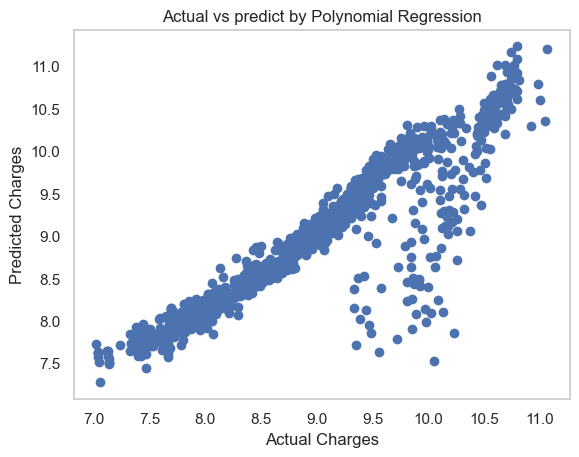

In [44]:
plt.scatter(y_train,y_train_pred)
plt.title('Actual vs predict by Polynomial Regression')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid()
plt.show()

In [45]:
#Show Coefficient values with statsmodel
import statsmodels.api as sm

In [46]:
lm2 = sm.OLS(y,X).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Fri, 10 May 2024   Prob (F-statistic):               0.00
Time:                        01:16:43   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0346      0.001     39.655      0.000       0.033       0.036
bmi                  0.0134      0.002      6.381      0.000       0.009       0.017
children             0.1019      0.010     10.085      0.000       0.082       0.122
sex_female           3.1107      0.031    101.457      0.000       3.051       3.171
sex_male             3.0353      0.031     97.442      0.000       2.974       3.096
smoker_no            2.2958      0.031     74.656      0.000       2.236       2.356
smoker_yes           3.8502      0.034    114.769      0.000       3.784       3.916
region_northeast     1.6240      0.024     66.712      0.000       1.576       1.672
region_northwest     1.5602      0.024     63.759      0.000       1.512       1.608
region_southeast     1.4668      0.028     52.425      0.000       1.412       1.522
region_southwest     1.4950      0.026     58.088      0.000       1.445       1.546
==============================================================================
Omnibus:                      463.882   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.760
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                     2.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusion :

The most affect factors of Insurance charges is Smoking Factors.

The Best Machine Learning Model is Polynomial Regression has R2 = 0.85